In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor # try classifier next

df = pd.read_csv('../content/csv/FINALDATASET_EastSlopesNorth.csv')
df.set_index('Date', inplace=True)

df.drop('Area', inplace=True, axis=1)

elevations = ['Above Treeline', 'At Treeline', 'Below Treeline']


# df.drop('Below Treeline', inplace=True, axis=1)

def try_elevation_score(training_data, elevation):

    for elev in [e for e in elevations if e != elevation]:
        training_data = training_data.drop(elev, axis=1)

    x = training_data.drop(elevation, axis=1)
    y = training_data[elevation]

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    rf_regressor = RandomForestRegressor(random_state=42)

    rf_regressor.fit(x_train, y_train)

    print(elevation)
    y_pred_train = rf_regressor.predict(x_train)
    y_pred = rf_regressor.predict(x_test)

    print('\tTraining:', r2_score(y_train, y_pred_train), '\tActual:', r2_score(y_test, y_pred))

for elev in elevations:
    try_elevation_score(df, elev)

print('\nDrop Yesterday Danger Ratings\n')

df.drop('Yesterday Danger Above Treeline', axis=1, inplace=True)
df.drop('Yesterday Danger At Treeline', axis=1, inplace=True)
df.drop('Yesterday Danger Below Treeline', axis=1, inplace=True)

for elev in elevations:
    try_elevation_score(df, elev)

Above Treeline
	Training: 0.8550229493482103 	Actual: -0.014947622282608819
At Treeline
	Training: 0.8567937608898102 	Actual: 0.31776602056962033
Below Treeline
	Training: 0.8572588170565993 	Actual: 0.4121811868686869

Drop Yesterday Danger Ratings

Above Treeline
	Training: 0.8514463993531203 	Actual: -0.1006156250000001
At Treeline
	Training: 0.8450457820135384 	Actual: 0.15821633702531657
Below Treeline
	Training: 0.8488756173933594 	Actual: 0.17949892676767665


/tmp/ipykernel_3836/2432435132.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

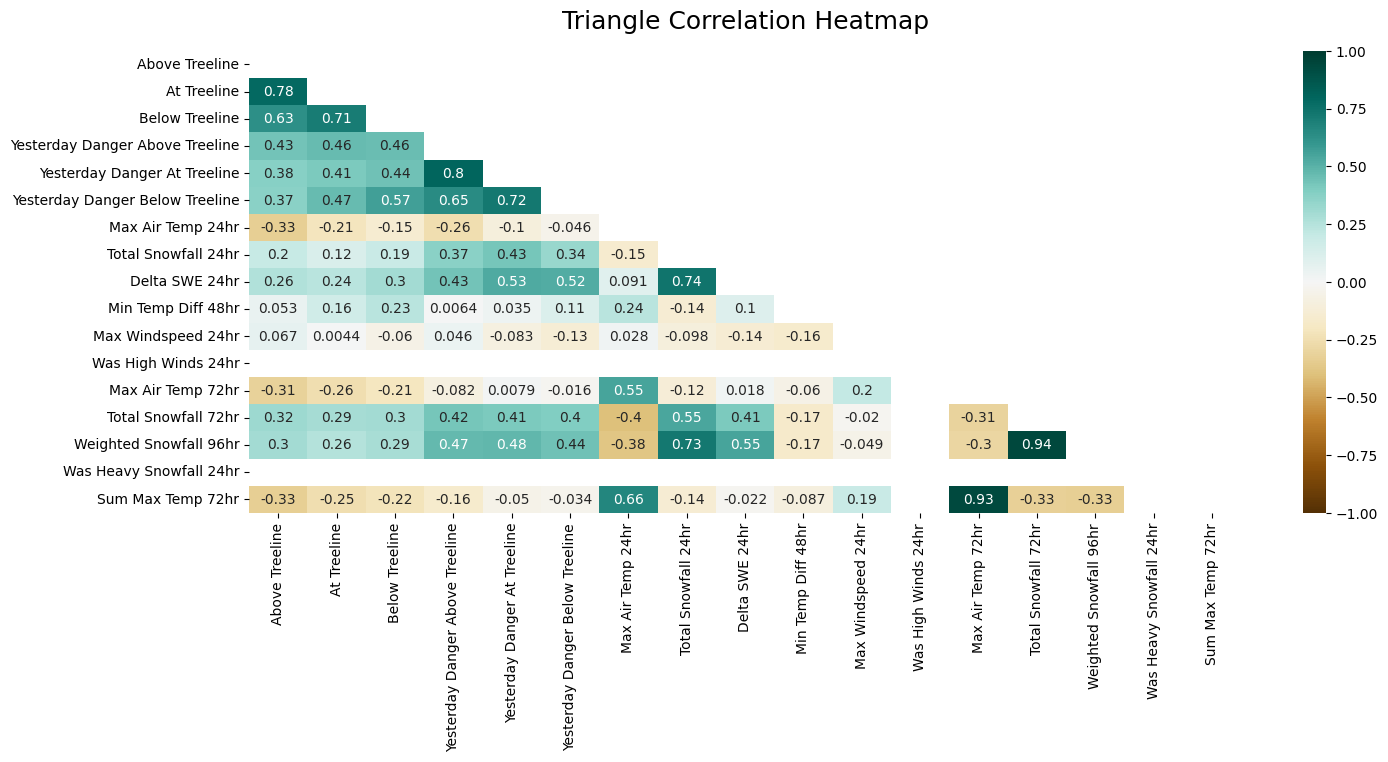

In [3]:
df = pd.read_csv('../content/csv/FINALDATASET_EastSlopesNorth.csv')
df.set_index('Date', inplace=True)

df.drop('Area', inplace=True, axis=1)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

In [4]:
df.corr()[['Above Treeline']].sort_values(by='Above Treeline', ascending=False)

,Above Treeline
Above Treeline,1.000000
At Treeline,0.783421
Below Treeline,0.625692
Yesterday Danger Above Treeline,0.430953
Yesterday Danger At Treeline,0.376077
Yesterday Danger Below Treeline,0.369602
Total Snowfall 72hr,0.315885
Weighted Snowfall 96hr,0.302737
Delta SWE 24hr,0.258217
Total Snowfall 24hr,0.203089


In [5]:
df.corr()[['At Treeline']].sort_values(by='At Treeline', ascending=False)

,At Treeline
At Treeline,1.000000
Above Treeline,0.783421
Below Treeline,0.707180
Yesterday Danger Below Treeline,0.468353
Yesterday Danger Above Treeline,0.462098
Yesterday Danger At Treeline,0.413179
Total Snowfall 72hr,0.290446
Weighted Snowfall 96hr,0.257642
Delta SWE 24hr,0.238097
Min Temp Diff 48hr,0.157244


In [6]:
df.corr()[['Below Treeline']].sort_values(by='Below Treeline', ascending=False)

,Below Treeline
Below Treeline,1.000000
At Treeline,0.707180
Above Treeline,0.625692
Yesterday Danger Below Treeline,0.566656
Yesterday Danger Above Treeline,0.456499
Yesterday Danger At Treeline,0.439389
Delta SWE 24hr,0.301827
Total Snowfall 72hr,0.298792
Weighted Snowfall 96hr,0.288700
Min Temp Diff 48hr,0.234776


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor # try classifier next

def get_r2_score(training_data, drop):
    """Returns training score, actual score"""
    x = training_data.drop(drop, axis=1)
    y = training_data[drop]

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(x_train, y_train)

    y_pred_train = rf_regressor.predict(x_train)
    y_pred = rf_regressor.predict(x_test)


    return r2_score(y_train, y_pred_train), r2_score(y_test, y_pred)

# Try dropping every column to get a better score
def find_bad_col(df, drop):
    max_r2 = get_r2_score(df, drop)[1]
    bad_col = None
    for col in df.columns[1:]:
        training, actual = get_r2_score(df.drop([col], axis=1), drop)
        if actual > max_r2:
            max_r2 = actual
            bad_col = col
    print('Increased r2 to:', max_r2, 'by deleting:', bad_col)

start_df = df.drop(['Yesterday Danger Above Treeline', 'Yesterday Danger At Treeline', 'Yesterday Danger Below Treeline'], axis=1)

print('--- Above Treeline ---')
drop_treeline = start_df.drop(['At Treeline', 'Below Treeline'], axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
drop_treeline = drop_treeline.drop('Total Snowfall 24hr', axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
drop_treeline = drop_treeline.drop('Sum Max Temp 72hr', axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
drop_treeline = drop_treeline.drop('Was Heavy Snowfall 24hr', axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
drop_treeline = drop_treeline.drop('Total Snowfall 72hr', axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
drop_treeline = drop_treeline.drop('Max Air Temp 72hr', axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
drop_treeline = drop_treeline.drop('Min Temp Diff 48hr', axis=1)
find_bad_col(drop_treeline, 'Above Treeline')
print(drop_treeline.columns)
print('--- At Treeline ---')
drop_treeline = start_df.drop(['Above Treeline', 'Below Treeline'], axis=1)
find_bad_col(drop_treeline, 'At Treeline')
drop_treeline = drop_treeline.drop('Max Air Temp 24hr', axis=1)
find_bad_col(drop_treeline, 'At Treeline')
drop_treeline = drop_treeline.drop('Sum Max Temp 72hr', axis=1)
find_bad_col(drop_treeline, 'At Treeline')
drop_treeline = drop_treeline.drop('Total Snowfall 24hr', axis=1)
find_bad_col(drop_treeline, 'At Treeline')
drop_treeline = drop_treeline.drop('Was Heavy Snowfall 24hr', axis=1)
find_bad_col(drop_treeline, 'At Treeline')
drop_treeline = drop_treeline.drop('Was High Winds 24hr', axis=1)
find_bad_col(drop_treeline, 'At Treeline')
print(drop_treeline.columns)
print('--- Below Treeline ---')
drop_treeline = start_df.drop(['Above Treeline', 'At Treeline'], axis=1)
find_bad_col(drop_treeline, 'Below Treeline')
drop_treeline = drop_treeline.drop('Total Snowfall 24hr', axis=1)
find_bad_col(drop_treeline, 'Below Treeline')
drop_treeline = drop_treeline.drop('Sum Max Temp 72hr', axis=1)
find_bad_col(drop_treeline, 'Below Treeline')
print(drop_treeline.columns)

--- Above Treeline ---
Increased r2 to: -0.07213974184782601 by deleting: Total Snowfall 24hr
Increased r2 to: -0.012659850543478512 by deleting: Sum Max Temp 72hr
Increased r2 to: 0.04493192934782597 by deleting: Was Heavy Snowfall 24hr
Increased r2 to: 0.046819157608695705 by deleting: Total Snowfall 72hr
Increased r2 to: 0.07931331521739138 by deleting: Max Air Temp 72hr
Increased r2 to: 0.127475679347826 by deleting: Min Temp Diff 48hr
Increased r2 to: 0.127475679347826 by deleting: None
Index(['Above Treeline', 'Max Air Temp 24hr', 'Delta SWE 24hr',
       'Max Windspeed 24hr', 'Was High Winds 24hr', 'Weighted Snowfall 96hr'],
      dtype='object')
--- At Treeline ---
Increased r2 to: 0.21509280063291147 by deleting: Max Air Temp 24hr
Increased r2 to: 0.2501954905063293 by deleting: Sum Max Temp 72hr
Increased r2 to: 0.2587966376582278 by deleting: Total Snowfall 24hr
Increased r2 to: 0.26339299841772157 by deleting: Was Heavy Snowfall 24hr
Increased r2 to: 0.2747071598101266 by d